/var/folders/hl/0r3fbld566g2q0_dh3lc7mcw0000gn/T/ipykernel_4170/3674616916.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


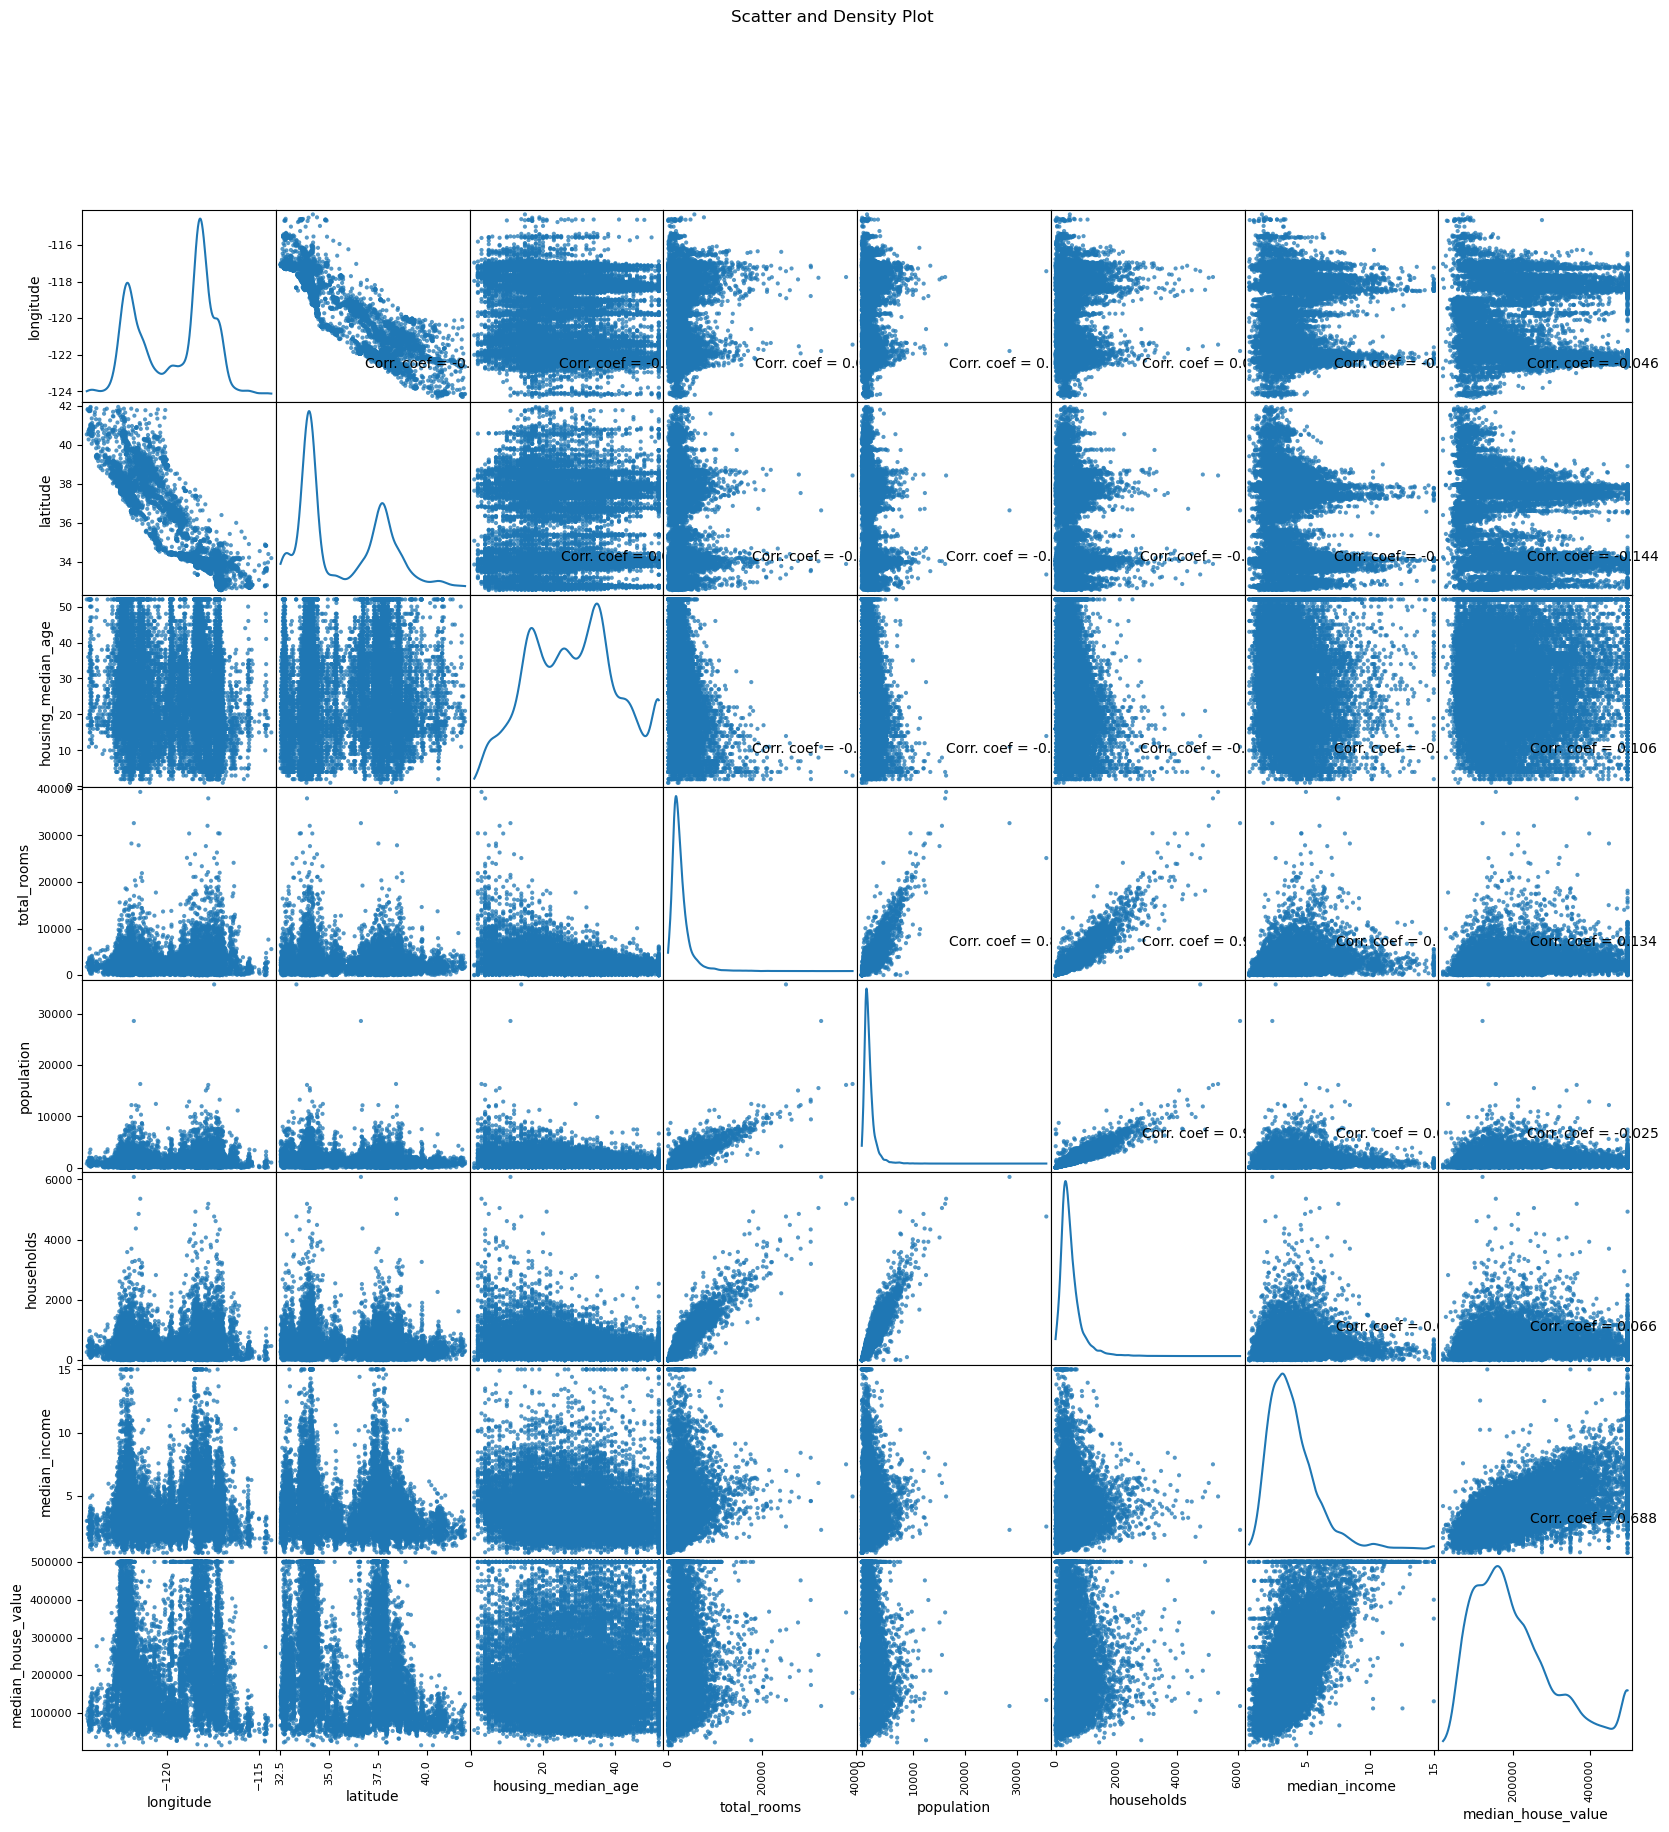

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Data Shape


(20640, 10)


Missing Values: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0

/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.801e+12, tolerance: 1.919e+10
  model = cd_fast.enet_coordinate_descent(
/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.801e+12, tolerance: 1.919e+10
  model = cd_fast.enet_coordinate_desce

Best Ridge Regression Model R² Score: 0.63871 (alpha = 0.001)
Best Lasso Regression Model R² Score: 0.63871 (alpha = 0.001)


/Users/alkis/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.802e+12, tolerance: 1.919e+10
  model = cd_fast.enet_coordinate_descent(


Linear Regression Model R² Score: 0.63871
Ridge Regression Model R² Score: 0.63860
Lasso Regression Model R² Score: 0.63870
Random Forest Regression Model R² Score: 0.72776
Polynomial Regression Model (Degree 1) R² Score: 0.63871

Linear Regression:
Mean Squared Error: 4836500775.27808
Coefficients: [ 1.15248900e+03 -6.49690554e+00  5.77765523e+01 -3.84788407e+01
  1.01144328e+02  4.01787494e+04 -1.95710574e+04 -8.82109186e+04
  1.30188597e+05 -1.58354960e+04 -6.57112525e+03]
Intercept: 47534.82647

Ridge Regression:
Mean Squared Error: 4838025677.43635
Coefficients: [ 1.15321614e+03 -6.49610392e+00  5.78393698e+01 -3.84799509e+01
  1.01076535e+02  4.01788517e+04 -1.41426276e+04 -8.27732053e+04
  1.08471421e+05 -1.04112719e+04 -1.14431568e+03]
Intercept: 42086.18056

Lasso Regression:
Mean Squared Error: 4836665646.29206
Coefficients: [ 1.15263237e+03 -6.49680852e+00  5.77839620e+01 -3.84796736e+01
  1.01138655e+02  4.01788204e+04  1.90505268e+04 -4.95875510e+04
  1.65193505e+05  2.277

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler

#Read the dataset
df = pd.read_csv('housing.csv')
df.head()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 10)

#Printing the discriptive statistics to gain a better overview of the dataset
df.info()

# Creating function to print info on the dataset
def inspect_data(df):
    print('Data Shape')
    print('\n')
    print(df.shape)
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    
inspect_data(df)

# One-hot encode the ocean_proximity column
one_hot_encoder = OneHotEncoder(sparse=False)
ocean_proximity_encoded = one_hot_encoder.fit_transform(df[['ocean_proximity']])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=one_hot_encoder.categories_[0])
df = pd.concat([df.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

# Fill missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

# Drop the longitude and latitude columns
X = X.drop(['longitude', 'latitude'], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the most common alpha values to test
common_alphas = [0.001, 0.01, 0.1, 0.5, 1, 10]

best_r2_ridge = 0
best_alpha_ridge = 0
best_r2_lasso = 0
best_alpha_lasso = 0

# Iterate over the most common alpha values and find the best R² score for Ridge and Lasso regression models
for alpha in common_alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    y_pred_ridge = ridge.predict(X_test)
    y_pred_lasso = lasso.predict(X_test)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    if r2_ridge > best_r2_ridge:
        best_r2_ridge = r2_ridge
        best_alpha_ridge = alpha
    
    if r2_lasso > best_r2_lasso:
        best_r2_lasso = r2_lasso
        best_alpha_lasso = alpha

print(f'Best Ridge Regression Model R² Score: {best_r2_ridge:.5f} (alpha = {best_alpha_ridge})')
print(f'Best Lasso Regression Model R² Score: {best_r2_lasso:.5f} (alpha = {best_alpha_lasso})')
# Initialize the models
lr = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)
rf = RandomForestRegressor(random_state=42)

poly_degree = 1

poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Fit and predict with normal data
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_pred_lr_poly = lr_poly.predict(X_test_poly)


# Calculate R² scores
score_lr = r2_score(y_test, y_pred_lr)
score_ridge = r2_score(y_test, y_pred_ridge)
score_lasso = r2_score(y_test, y_pred_lasso)
score_rf = r2_score(y_test, y_pred_rf)

score_lr_poly = r2_score(y_test, y_pred_lr_poly)

print(f'Linear Regression Model R² Score: {score_lr:.5f}')
print(f'Ridge Regression Model R² Score: {score_ridge:.5f}')
print(f'Lasso Regression Model R² Score: {score_lasso:.5f}')
print(f'Random Forest Regression Model R² Score: {score_rf:.5f}')
print(f'Polynomial Regression Model (Degree {poly_degree}) R² Score: {score_lr_poly:.5f}')

# Print MSE, coefficients, and intercepts

models = [('Linear Regression', lr), ('Ridge Regression', ridge), ('Lasso Regression', lasso), ('Random Forest Regression', rf), (f'Polynomial Regression (Degree {poly_degree})', lr_poly)]
for name, model in models:
    if name.startswith("Polynomial Regression"):
        X_test_model = X_test_poly
    else:
        X_test_model = X_test
        print(f'\n{name}:')
        mse = mean_squared_error(y_test, model.predict(X_test_model))
        print(f'Mean Squared Error: {mse:.5f}')
        if not name.startswith("Random Forest"):
            print(f'Coefficients: {model.coef_}')
            print(f'Intercept: {model.intercept_:.5f}')
        else:
            print("Feature importances: ", model.feature_importances_)

# Print MSE for Polynomial Regression
mse_lr_poly = mean_squared_error(y_test, y_pred_lr_poly)
print(f'\nPolynomial Regression Model (Degree {poly_degree})')
print(f'Mean Squared Error: {mse_lr_poly:.5f}')

In [2]:
from sklearn.model_selection import GridSearchCV

# Create a function to fit and evaluate polynomial regression with different degrees
def fit_and_evaluate_poly(X_train, X_test, y_train, y_test, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)
    
    y_pred_lr_poly = lr_poly.predict(X_test_poly)
    
    score_lr_poly = r2_score(y_test, y_pred_lr_poly)
    mse = mean_squared_error(y_test, y_pred_lr_poly)
    
    return score_lr_poly, mse, lr_poly, poly_features

# Test different polynomial degrees
best_degree = 1
best_score = float('-inf')
best_mse = float('inf')
best_lr_poly = None
best_poly_features = None

for degree in range(1, 5):
    score, mse, lr_poly, poly_features = fit_and_evaluate_poly(X_train, X_test, y_train, y_test, degree)
    
    print(f'Polynomial Regression Model (Degree {degree}) R² Score: {score:.5f}')
    
    if score > best_score:
        best_degree = degree
        best_score = score
        best_mse = mse
        best_lr_poly = lr_poly
        best_poly_features = poly_features

# Update models list with the best polynomial model
models[-1] = (f'Polynomial Regression (Degree {best_degree})', best_lr_poly)

# Print MSE, coefficients, and intercepts
for name, model in models:
    if name.startswith("Polynomial Regression"):
        X_test_model = best_poly_features.transform(X_test)
    else:
        X_test_model = X_test

    print(f'\n{name}:')
    mse = mean_squared_error(y_test, model.predict(X_test_model))
    print(f'Mean Squared Error: {mse:.5f}')
    if not name.startswith("Random Forest"):
        print(f'Coefficients: {model.coef_}')
        print(f'Intercept: {model.intercept_:.5f}')
    else:
        print("Feature importances: ", model.feature_importances_)


Polynomial Regression Model (Degree 1) R² Score: 0.63871
Polynomial Regression Model (Degree 2) R² Score: -450386.62171
Polynomial Regression Model (Degree 3) R² Score: -1.40254
Polynomial Regression Model (Degree 4) R² Score: -4963.38233

Linear Regression:
Mean Squared Error: 4836500775.27808
Coefficients: [ 1.15248900e+03 -6.49690554e+00  5.77765523e+01 -3.84788407e+01
  1.01144328e+02  4.01787494e+04 -1.95710574e+04 -8.82109186e+04
  1.30188597e+05 -1.58354960e+04 -6.57112525e+03]
Intercept: 47534.82647

Ridge Regression:
Mean Squared Error: 4838025677.43635
Coefficients: [ 1.15321614e+03 -6.49610392e+00  5.78393698e+01 -3.84799509e+01
  1.01076535e+02  4.01788517e+04 -1.41426276e+04 -8.27732053e+04
  1.08471421e+05 -1.04112719e+04 -1.14431568e+03]
Intercept: 42086.18056

Lasso Regression:
Mean Squared Error: 4836665646.29206
Coefficients: [ 1.15263237e+03 -6.49680852e+00  5.77839620e+01 -3.84796736e+01
  1.01138655e+02  4.01788204e+04  1.90505268e+04 -4.95875510e+04
  1.65193505e+

In [3]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
score_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f'Elastic Net Regression Model R² Score: {score_elastic_net:.5f}')

print('\nElastic Net Regression:')
mse_elastic_net = mean_squared_error(y_test, elastic_net.predict(X_test))
print(f'Mean Squared Error: {mse_elastic_net:.5f}')
print(f'Coefficients: {elastic_net.coef_}')
print(f'Intercept: {elastic_net.intercept_:.5f}')


Elastic Net Regression Model R² Score: 0.61889

Elastic Net Regression:
Mean Squared Error: 5101838938.60008
Coefficients: [ 1.48900816e+03 -6.62830745e+00  3.74859555e+01 -4.09911861e+01
  1.35330801e+02  3.94943964e+04  1.14124417e+04 -2.75268645e+04
  8.94721973e+01  5.60385072e+03  1.04180998e+04]
Intercept: 607.87485


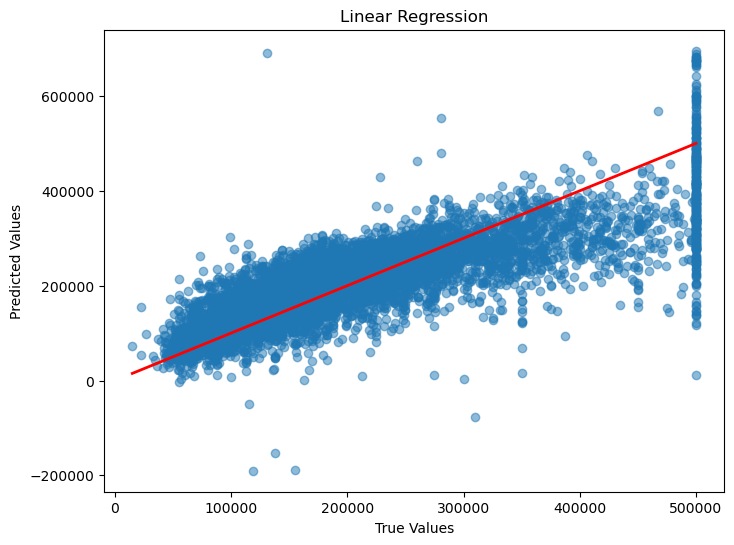

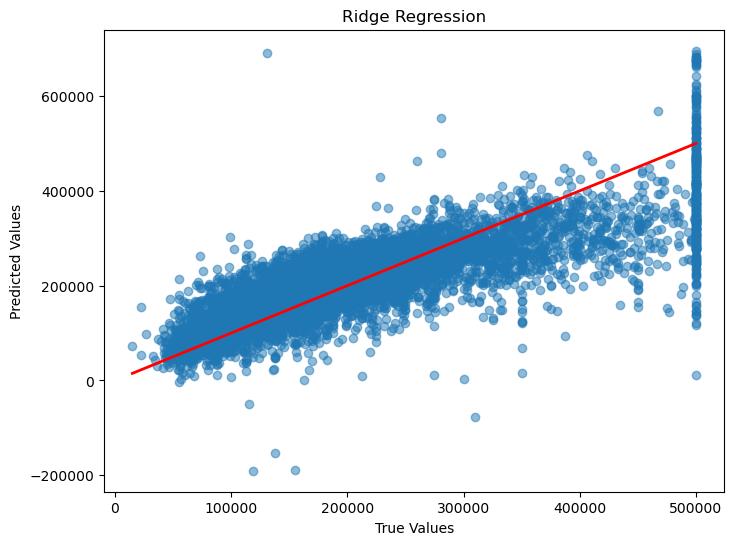

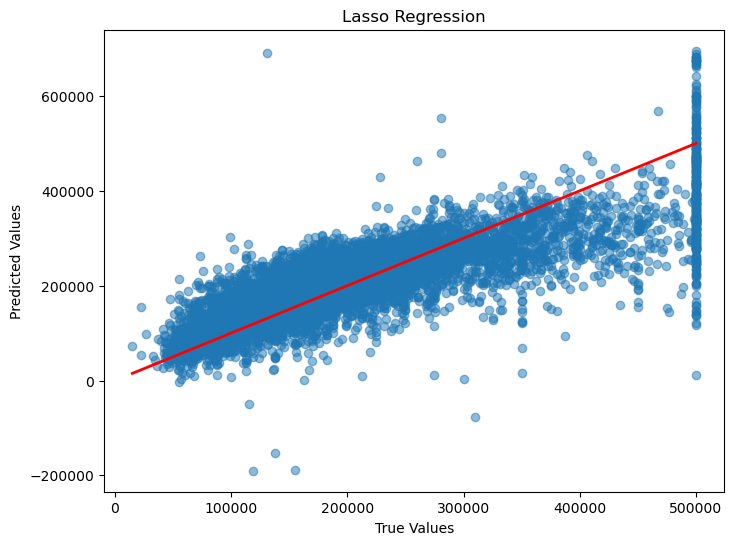

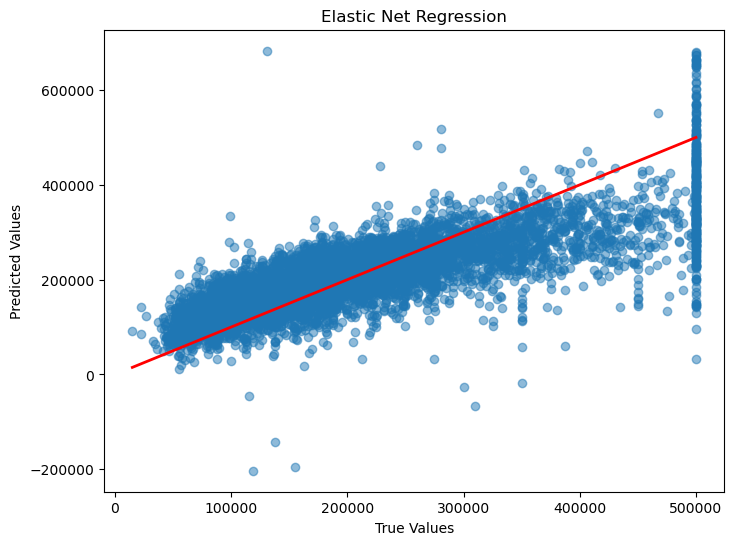

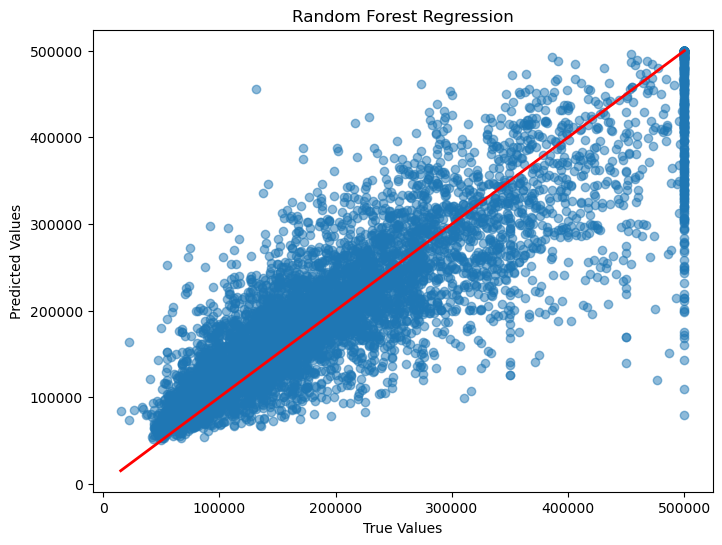

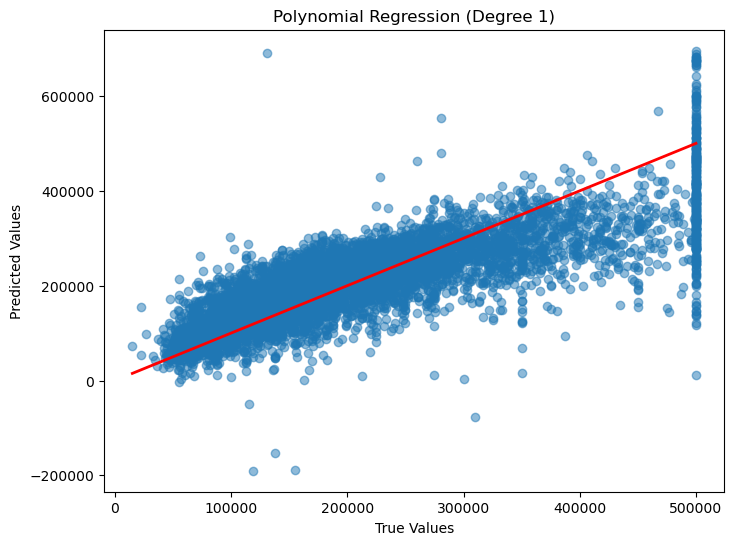

In [4]:
def plot_regression_results(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linewidth=2)
    plt.show()

plot_regression_results(y_test, y_pred_lr, 'Linear Regression')
plot_regression_results(y_test, y_pred_ridge, 'Ridge Regression')
plot_regression_results(y_test, y_pred_lasso, 'Lasso Regression')
plot_regression_results(y_test, y_pred_elastic_net, 'Elastic Net Regression')
plot_regression_results(y_test, y_pred_rf, 'Random Forest Regression')
plot_regression_results(y_test, y_pred_lr_poly, 'Polynomial Regression (Degree 1)')



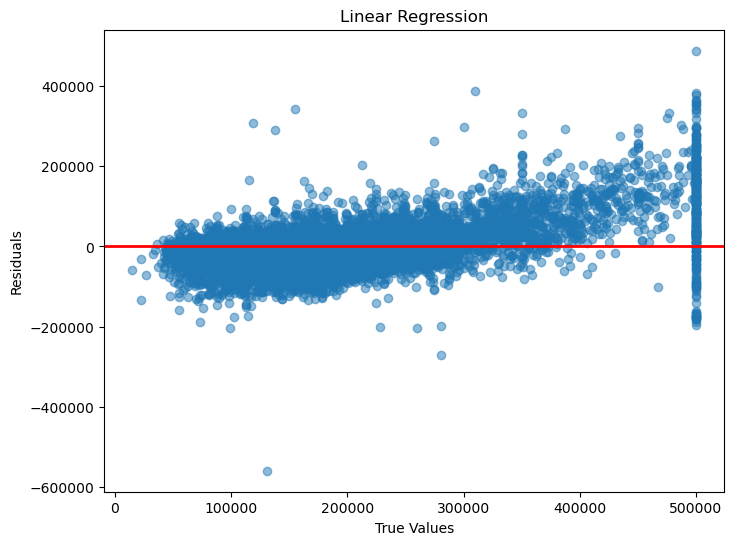

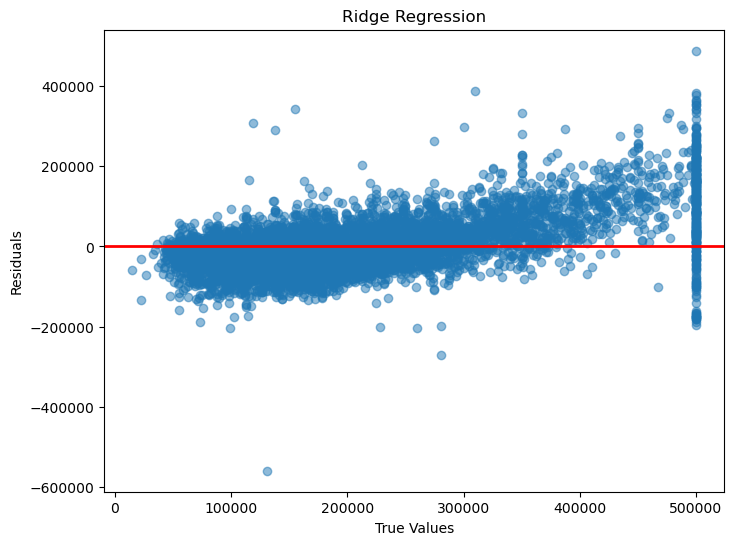

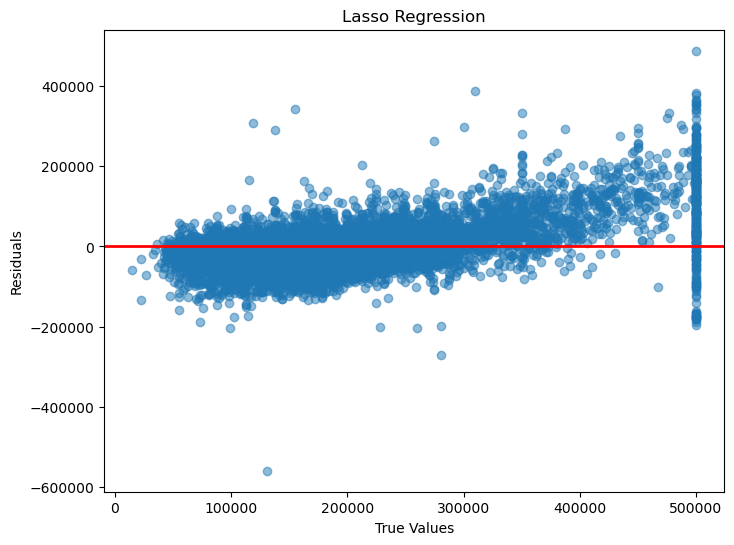

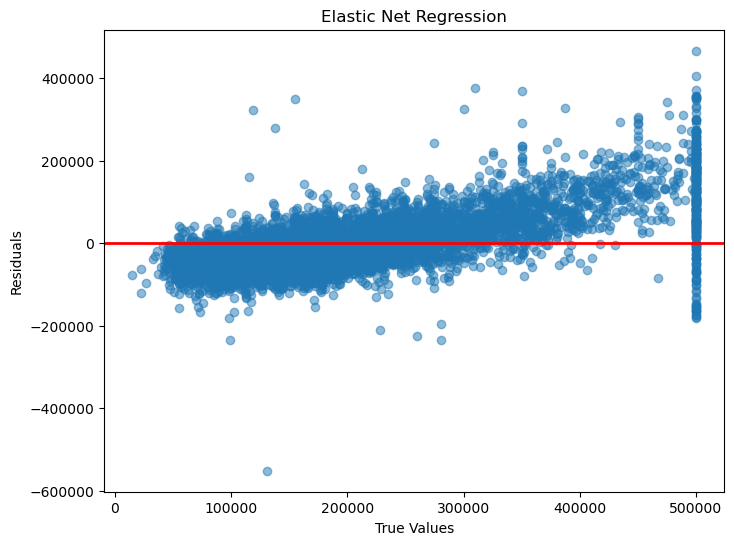

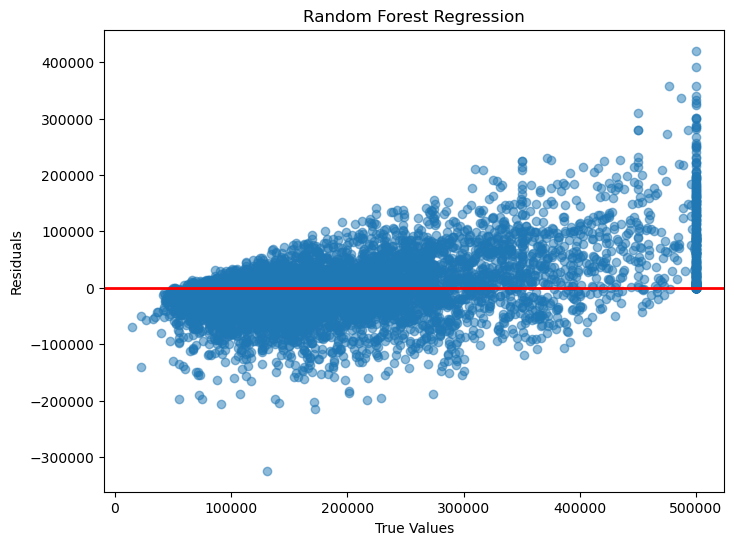

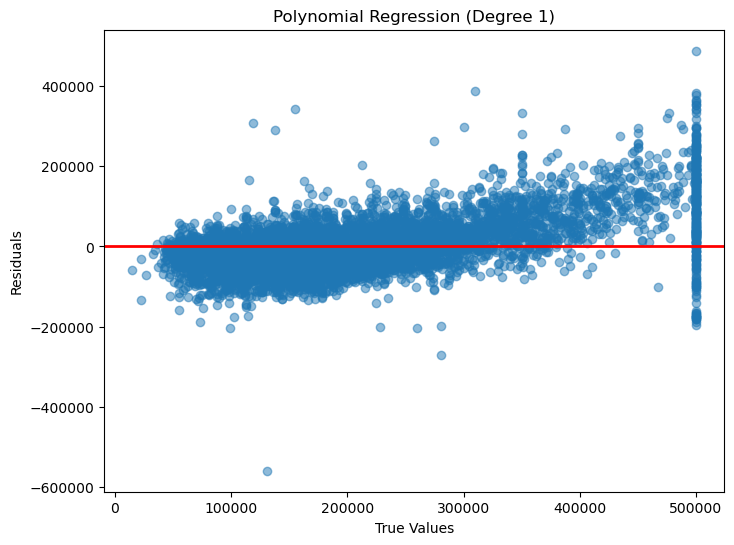

In [5]:
#plot the residuals (the difference between the true values and the predicted values) against the true values.


def plot_residuals(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    residuals = y_true - y_pred
    plt.scatter(y_true, residuals, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='red', linewidth=2)
    plt.show()

plot_residuals(y_test, y_pred_lr, 'Linear Regression')
plot_residuals(y_test, y_pred_ridge, 'Ridge Regression')
plot_residuals(y_test, y_pred_lasso, 'Lasso Regression')
plot_residuals(y_test, y_pred_elastic_net, 'Elastic Net Regression')
plot_residuals(y_test, y_pred_rf, 'Random Forest Regression')
plot_residuals(y_test, y_pred_lr_poly, 'Polynomial Regression (Degree 1)')



In [11]:
#Extra graphs to see information about the Regressions


# import seaborn as sns

# def plot_regression(model, X_test, y_test, model_name, feature_name):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')
#     sns.scatterplot(x=X_test[feature_name], y=model.predict(X_test), alpha=0.3, label='Predicted Values')
#     plt.title(f'{model_name} Regression Plot')
#     plt.legend()
#     plt.show()

# # Feature to use for plotting
# selected_feature = 'median_income'

# # Plot Linear Regression
# plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# # Plot Ridge Regression
# plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# # Plot Lasso Regression
# plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)


In [9]:
#Extra graphs to see information about the Regressions


# import seaborn as sns

# def plot_regression(model, X_test, y_test, model_name, feature_name):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')

#     # Create a DataFrame with the feature and predicted values
#     predictions_df = pd.DataFrame({feature_name: X_test[feature_name], 'Predicted Values': model.predict(X_test)})
#     predictions_df = predictions_df.sort_values(by=feature_name)

#     # Plot the regression line using Seaborn's lineplot
#     sns.lineplot(x=predictions_df[feature_name], y=predictions_df['Predicted Values'], color='red', label='Regression Line')

#     plt.title(f'{model_name} Regression Plot')
#     plt.legend()
#     plt.show()

# # Feature to use for plotting
# selected_feature = 'median_income'

# # Plot Linear Regression
# plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# # Plot Ridge Regression
# plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# # Plot Lasso Regression
# plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)


In [10]:
#Extra graphs to see information about the Regressions

# import seaborn as sns
# import numpy as np

# def plot_regression(model, X_test, y_test, model_name, feature_name):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=X_test[feature_name], y=y_test, alpha=0.3, label='Actual Values')

#     # Create a grid of feature values spanning the range of the selected feature in the dataset
#     x_grid = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), num=100)

#     # Create a new DataFrame with the grid of feature values for each instance in the dataset
#     X_grid = pd.concat([X_test] * len(x_grid), ignore_index=True)
#     X_grid[feature_name] = np.tile(x_grid, len(X_test))

#     # Predict the target variable using the grid of feature values and plot the regression line
#     y_grid_pred = model.predict(X_grid)
#     sns.lineplot(x=X_grid[feature_name], y=y_grid_pred, color='red', label='Regression Line')

#     plt.title(f'{model_name} Regression Plot')
#     plt.legend()
#     plt.show()

# # Feature to use for plotting
# selected_feature = 'median_income'

# # Plot Linear Regression
# plot_regression(lr, X_test, y_test, 'Linear', selected_feature)

# # Plot Ridge Regression
# plot_regression(ridge, X_test, y_test, 'Ridge', selected_feature)

# # Plot Lasso Regression
# plot_regression(lasso, X_test, y_test, 'Lasso', selected_feature)
